In [5]:
######################################################
##########  Regression model #####################
######################################################

import pandas as pd
import numpy as np

diabetes_df = pd.read_csv("diabetes_clean.csv")
diabetes_df


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

#Prediction diabetes with one feature bmi
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)

#the X_bmi feature must be 2D for scikit-learn
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768,) (768,)
(768, 1)


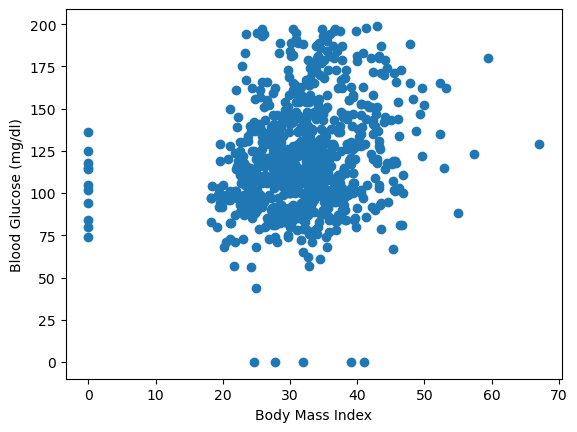

In [12]:
#plot glucose vs bmi
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()
#As bmi increases, blood glucose also tend to increase


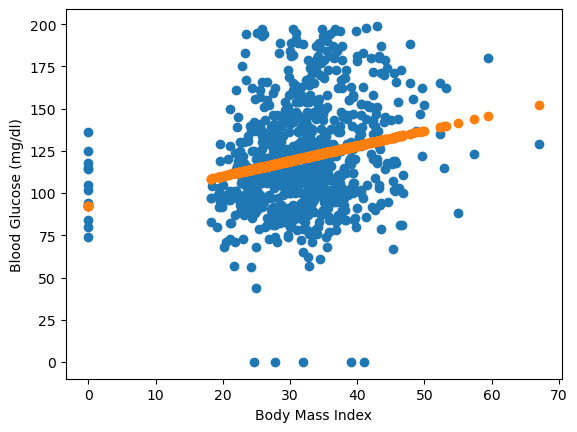

In [14]:
#Fitting a regression model
#The model fits a straight line to the data
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)

#we are modeling the relationship between the feature, body mass index, 
#and the target, blood glucose levels, 
#rather than predicting target values for new observations,

predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.scatter(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

#The orange line represents the linear regression model's fit of glucose values against bmi.
#The model has a weak-to-moderate posisitve correlation.


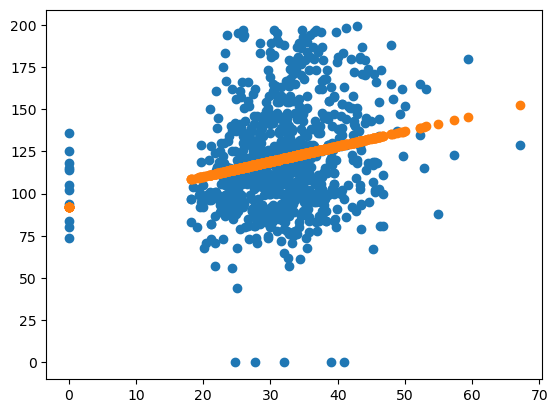

,0,0
0,33.6,0.896509
1,26.6,NaN
2,23.3,NaN
3,28.1,NaN
4,43.1,NaN
...,...,...
763,32.9,NaN
764,36.8,NaN
765,26.2,NaN
766,30.1,NaN


In [27]:
features = diabetes_df["bmi"]
target = diabetes_df["glucose"]

#print(features.shape, target.shape)
#features must be 2d array (or dataframe) not a Series
#target can be a Series
features = features.values.reshape(-1, 1)

model = LinearRegression()
model.fit(features, target)

pred = model.predict(features)

plt.scatter(features, target)
plt.scatter(features, pred)
plt.show()


In [30]:
##################################################################
#### Multiplelinear regression                               #####
### to predict blood glucose levels                          #####
### using all of the features from the diabetes dataset.     #####
##################################################################

# linear regression in scikit-learn performs OLS 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and test sets, 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,random_state=42)
# instantiate the model, 
reg_all = LinearRegression()
# fit it on the training set, 
reg_all.fit(xtrain, ytrain)
# and predict on the test set.
y_pred = reg_all.predict(xtest)

# R-squared in scikit-learn default metric 
reg_all.score(xtest, ytest)
#Here, the features explain 28% of blood glucose level variance.


0.2828046881037515

In [32]:
#MSE and RMSE to assess a regression model performance
#MSE=mean(R2) in target unit squared
#RMSE=square root(MSE) in target unit

#RMSE in scikit-learn
from sklearn.metrics import mean_squared_error

mean_squared_error(ytest, y_pred, squared=False)
#The model has an average error for blood glucose level of around 26mg/dl
#numbers are between 85-185

26.34145958223226

In [38]:
######################################
#### #the coefficients of the model
######################################

display(reg_all.coef_)

#These explain how much the target (glucose) changes with a change of 1 in each of the features (inputs), 
#while holding other features constant.

pd.concat([pd.DataFrame(diabetes_df.drop("glucose", axis=1).columns),pd.DataFrame(reg_all.coef_)], axis = 1)

array([-0.12267722,  0.15245613, -0.37458186,  0.09606823,  0.29436294,
        6.91457772,  0.36201688, 24.74852858])

,0,0
0,pregnancies,-0.122677
1,diastolic,0.152456
2,triceps,-0.374582
3,insulin,0.096068
4,bmi,0.294363
5,dpf,6.914578
6,age,0.362017
7,diabetes,24.748529


In [39]:
######################################
#The intercept of the model
######################################

reg_all.intercept_

#This is the target (glucose) for when all inputs are 0.

77.36654878575038

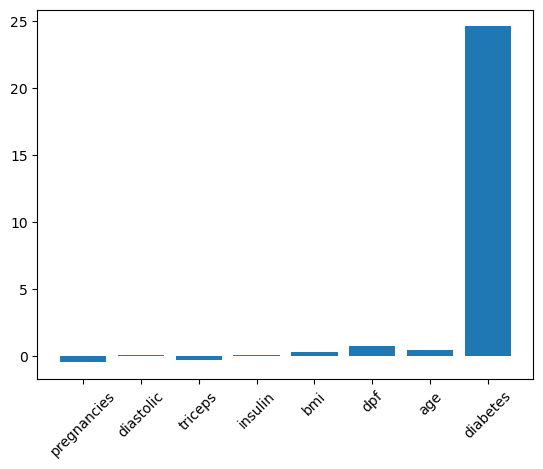

In [41]:
#############################################################
## how to apply regularization to our regression models.
#LASSO regularized regression for FEATURE SELECTION
#############################################################
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns

#We are calculating feature importance
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

#The most important predictor for our target variable, Blood Glucose Level
#is the binary value for whether an individual has diabetes or not
#Not a surprise but great sanity check